In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')
df.head()

,id,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,BeatsPerMinute
0,0,0.603610,-7.636942,0.023500,0.000005,0.000001,0.051385,0.409866,290715.6450,0.826267,147.53020
1,1,0.639451,-16.267598,0.071520,0.444929,0.349414,0.170522,0.651010,164519.5174,0.145400,136.15963
2,2,0.514538,-15.953575,0.110715,0.173699,0.453814,0.029576,0.423865,174495.5667,0.624667,55.31989
3,3,0.734463,-1.357000,0.052965,0.001651,0.159717,0.086366,0.278745,225567.4651,0.487467,147.91212
4,4,0.532968,-13.056437,0.023500,0.068687,0.000001,0.331345,0.477769,213960.6789,0.947333,89.58511


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524164 entries, 0 to 524163
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         524164 non-null  int64  
 1   RhythmScore                524164 non-null  float64
 2   AudioLoudness              524164 non-null  float64
 3   VocalContent               524164 non-null  float64
 4   AcousticQuality            524164 non-null  float64
 5   InstrumentalScore          524164 non-null  float64
 6   LivePerformanceLikelihood  524164 non-null  float64
 7   MoodScore                  524164 non-null  float64
 8   TrackDurationMs            524164 non-null  float64
 9   Energy                     524164 non-null  float64
 10  BeatsPerMinute             524164 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 44.0 MB


,id,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,BeatsPerMinute
count,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000
mean,262081.500000,0.632843,-8.379014,0.074443,0.262913,0.117690,0.178398,0.555843,241903.692949,0.500923,119.034899
std,151313.257587,0.156899,4.616221,0.049939,0.223120,0.131845,0.118186,0.225480,59326.601501,0.289952,26.468077
min,0.000000,0.076900,-27.509725,0.023500,0.000005,0.000001,0.024300,0.025600,63973.000000,0.000067,46.718000
25%,131040.750000,0.515850,-11.551933,0.023500,0.069413,0.000001,0.077637,0.403921,207099.876625,0.254933,101.070410
50%,262081.500000,0.634686,-8.252499,0.066425,0.242502,0.074247,0.166327,0.564817,243684.058150,0.511800,118.747660
75%,393122.250000,0.739179,-4.912298,0.107343,0.396957,0.204065,0.268946,0.716633,281851.658500,0.746000,136.686590
max,524163.000000,0.975000,-1.357000,0.256401,0.995000,0.869258,0.599924,0.978000,464723.228100,1.000000,206.037000


Observation:

 Dataset has (524164, 11) shape.
 Most columns are numerical.



In [5]:
df.info()
df.describe(include='all')

# Missing values
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
if not missing.empty:
    plt.figure(figsize=(10, 6))
    missing.plot(kind='bar')
    plt.title("Missing Values by Feature")
    plt.show()
else:
    print("✅ No missing values found.")

# Duplicates
print("Duplicate rows:", df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524164 entries, 0 to 524163
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         524164 non-null  int64  
 1   RhythmScore                524164 non-null  float64
 2   AudioLoudness              524164 non-null  float64
 3   VocalContent               524164 non-null  float64
 4   AcousticQuality            524164 non-null  float64
 5   InstrumentalScore          524164 non-null  float64
 6   LivePerformanceLikelihood  524164 non-null  float64
 7   MoodScore                  524164 non-null  float64
 8   TrackDurationMs            524164 non-null  float64
 9   Energy                     524164 non-null  float64
 10  BeatsPerMinute             524164 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 44.0 MB
✅ No missing values found.
Duplicate rows: 0


In [6]:
print("\n--- Descriptive Statistics ---")
print(df.describe().T)


--- Descriptive Statistics ---
                              count           mean            std  \
id                         524164.0  262081.500000  151313.257587   
RhythmScore                524164.0       0.632843       0.156899   
AudioLoudness              524164.0      -8.379014       4.616221   
VocalContent               524164.0       0.074443       0.049939   
AcousticQuality            524164.0       0.262913       0.223120   
InstrumentalScore          524164.0       0.117690       0.131845   
LivePerformanceLikelihood  524164.0       0.178398       0.118186   
MoodScore                  524164.0       0.555843       0.225480   
TrackDurationMs            524164.0  241903.692949   59326.601501   
Energy                     524164.0       0.500923       0.289952   
BeatsPerMinute             524164.0     119.034899      26.468077   

                                    min            25%            50%  \
id                             0.000000  131040.750000  262081.500

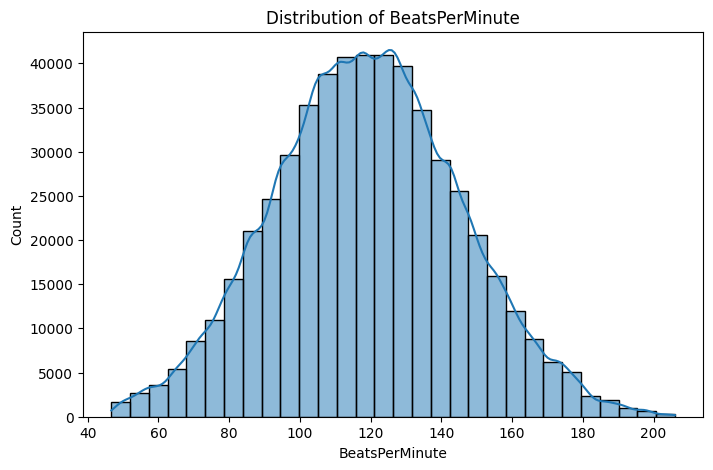

In [7]:
# target variable analysis
target = "BeatsPerMinute"

plt.figure(figsize=(8,5))
sns.histplot(df[target], kde=True, bins=30)
plt.title(f"Distribution of {target}")
plt.show()

Observations:

 The distribution looks approximately normal (bell-shaped), centered around 120 BPM.

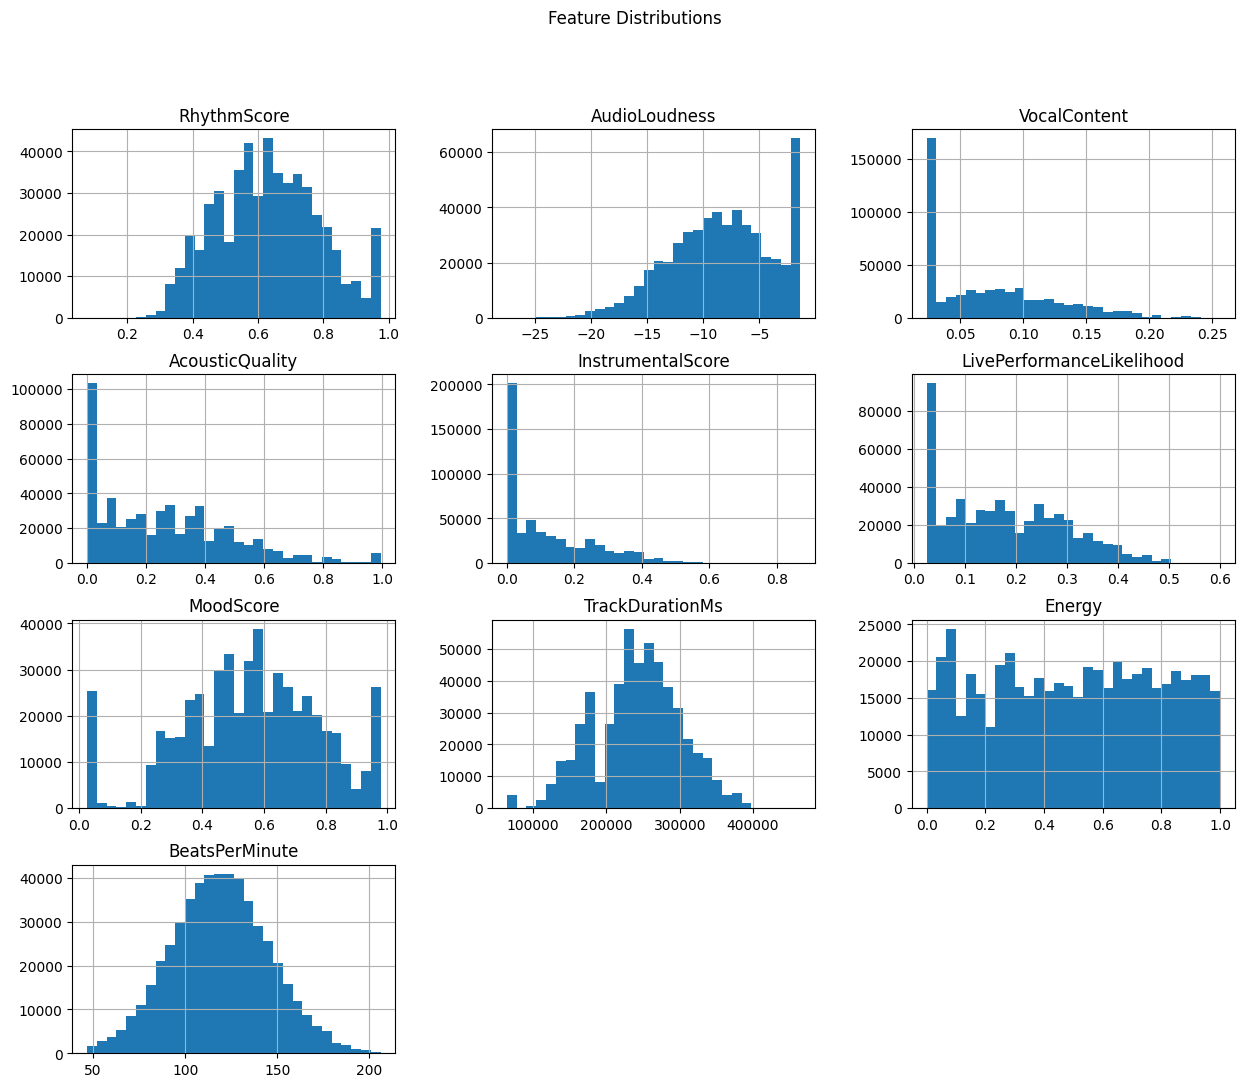

In [8]:
# Feature Distributions

num_features = df.select_dtypes(include=[np.number]).columns.tolist()
num_features.remove("id") # remove id if present

# Plot histograms for all numeric features
df[num_features].hist(bins=30, figsize=(15,12), layout=(4,3))
plt.suptitle("Feature Distributions")
plt.show()

Observations

1. RhythmScore: Bell-shaped, centered around 0.5–0.7.
2. AudioLoudness: Ranges between -25 dB to -5 dB and Looks slightly bimodal because it has two peaks.
3. VocalContent: Strongly right-skewed, most values clustered below 0.1.
4. AcousticQuality: Heavy skew towards 0 with a few high outliers.
5. InstrumentalScore: Mostly near 0, very few tracks have high instrumental score.
6. LivePerformanceLikelihood: right skewed, clustered near 0.05.
7. MoodScore: Distribution concentrated around 0–0.2, with some spread up to 1.
8. TrackDurationMs: binomial graph and Centered between 150k–300k ms (~2.5–5 min).
9. Energy: Uniform-like distribution across 0–1.
10. BeatsPerMinute (Target): Nearly normal, centered around 120 BPM.

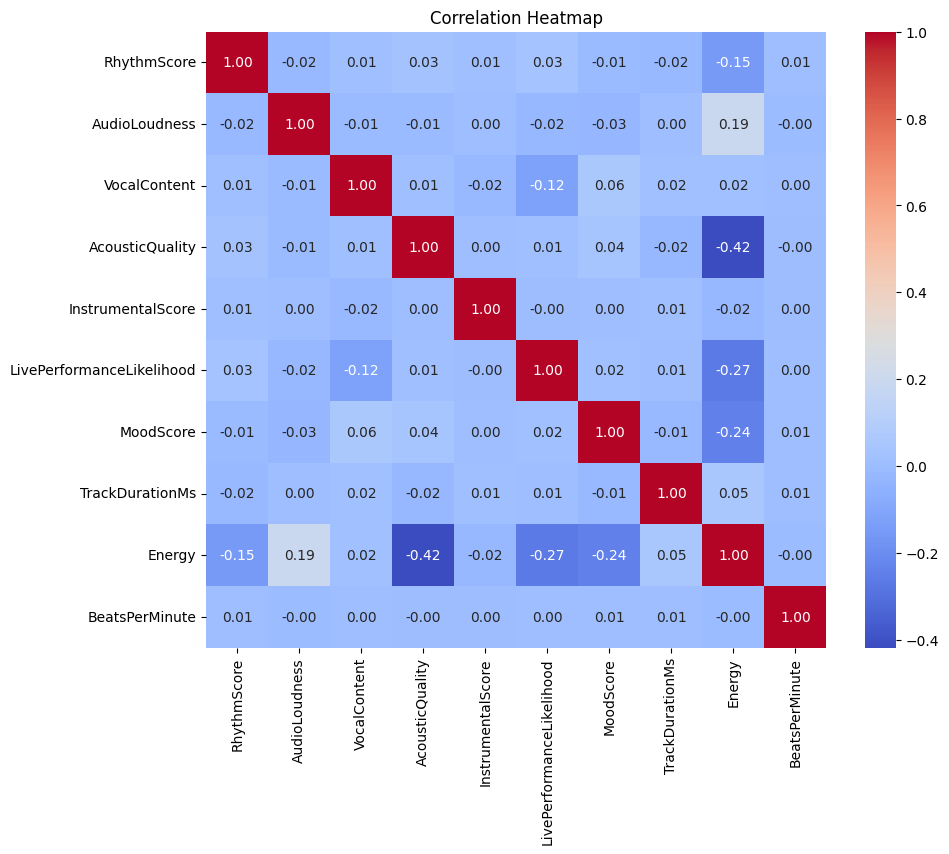


--- Correlation with Target ---
BeatsPerMinute               1.000000
MoodScore                    0.007059
TrackDurationMs              0.006637
RhythmScore                  0.005440
VocalContent                 0.004876
LivePerformanceLikelihood    0.003471
InstrumentalScore            0.001900
id                          -0.000355
AcousticQuality             -0.000820
AudioLoudness               -0.003327
Energy                      -0.004375
Name: BeatsPerMinute, dtype: float64


In [9]:
# 5. Correlation Analysis
plt.figure(figsize=(10,8))
sns.heatmap(df[num_features].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Correlation with target
print("\n--- Correlation with Target ---")
print(df.corr()[target].sort_values(ascending=False))

Observations:

1. very weak correlation with all features.
2. Other Feature Correlations (Between features) Energy & AcousticQuality: -0.42 (negative) Energy & AudioLoudness: +0.19 (weak positive) LivePerformanceLikelihood & Energy: -0.27 (negative) MoodScore & Energy: -0.24 (negative)

Since BeatsPerMinute has weak linear correlations, a simple linear regression may not explain much variance. better suited for non-linear regression approaches (like XGBoost) rather than plain linear regression.

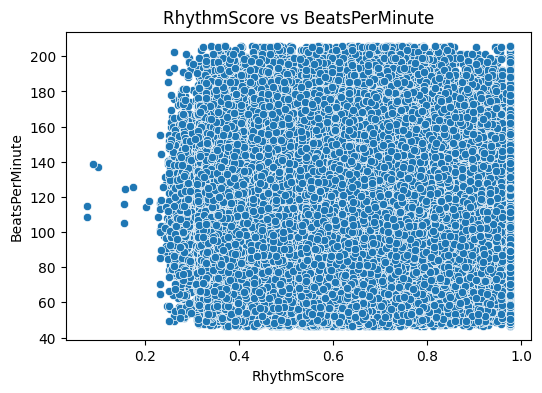

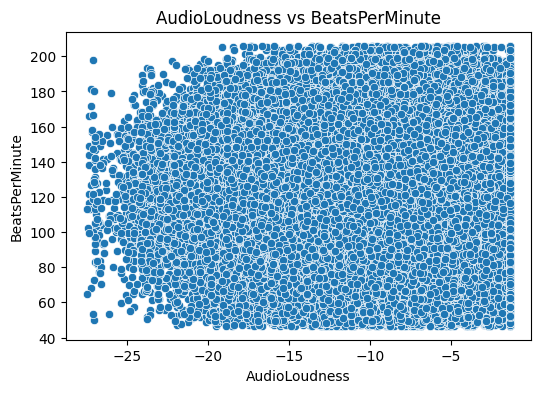

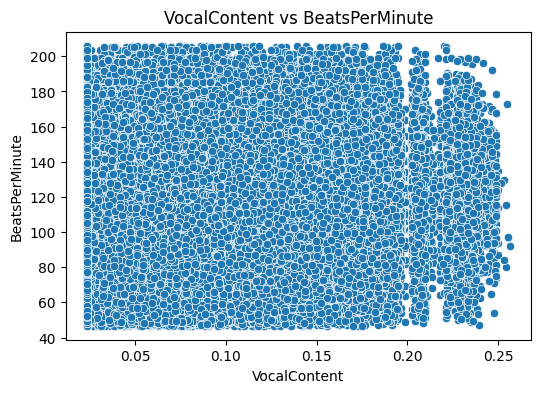

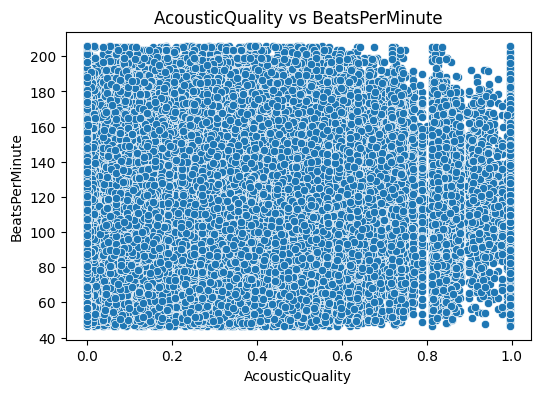

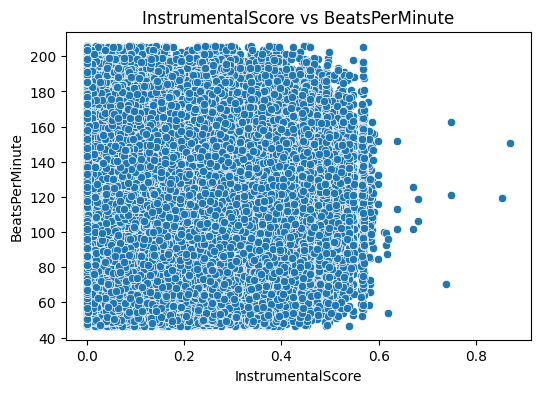

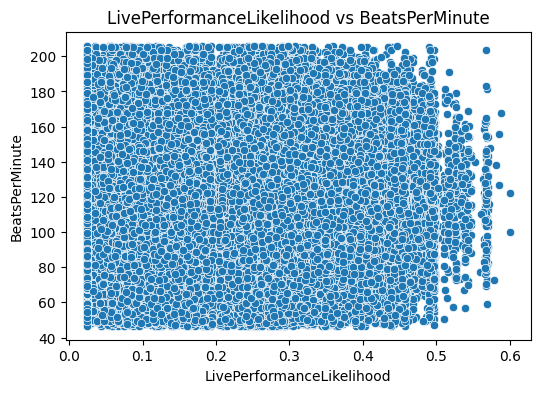

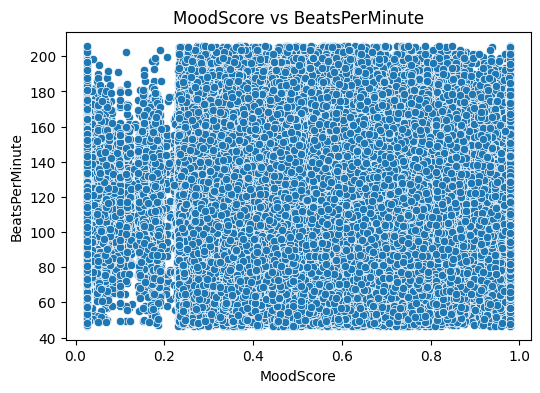

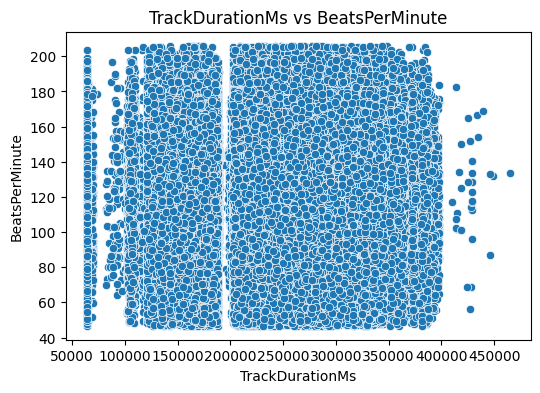

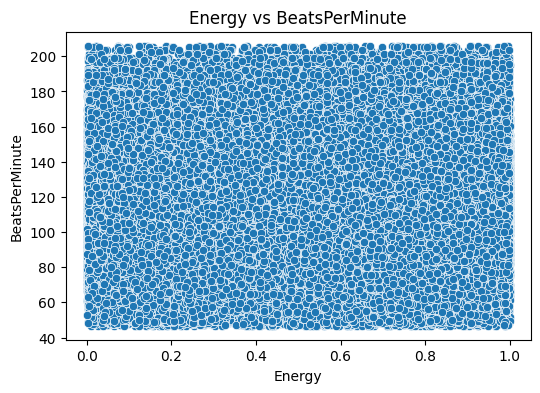

In [10]:
# 6. Feature vs Target Relationships
for col in num_features:
    if col != target:
        plt.figure(figsize=(6,4))
        sns.scatterplot(x=df[col], y=df[target])
        plt.title(f"{col} vs {target}")
        plt.show()

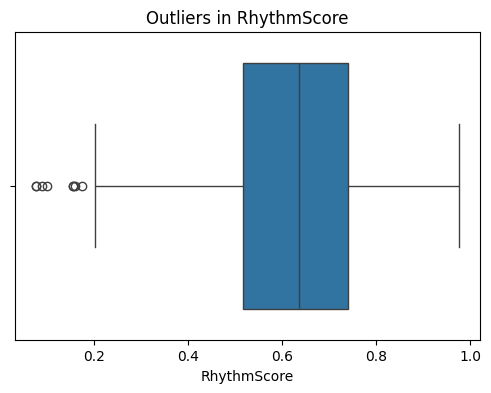

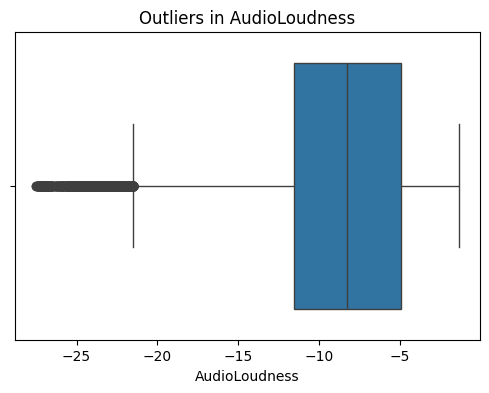

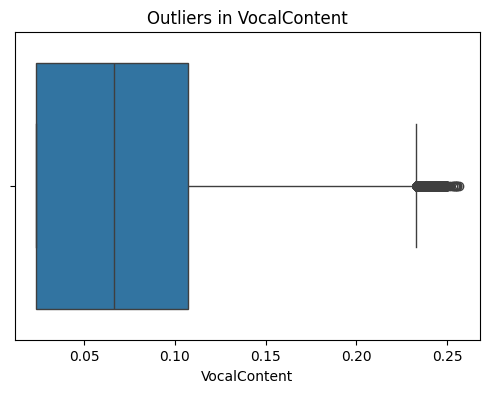

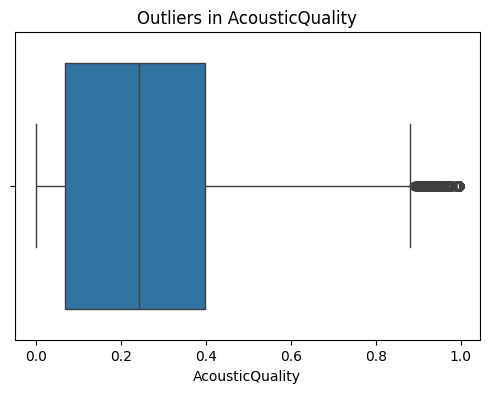

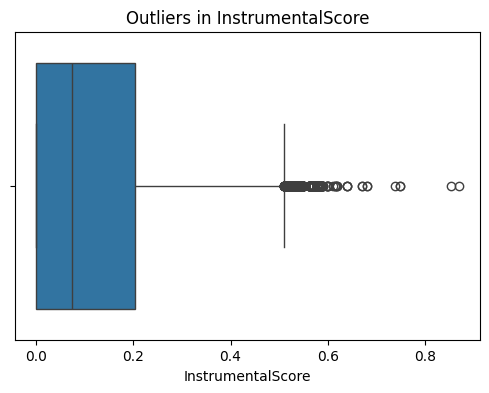

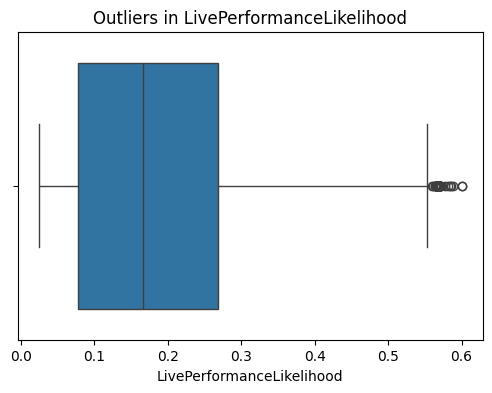

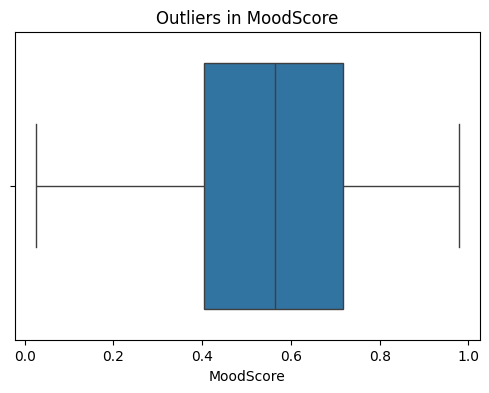

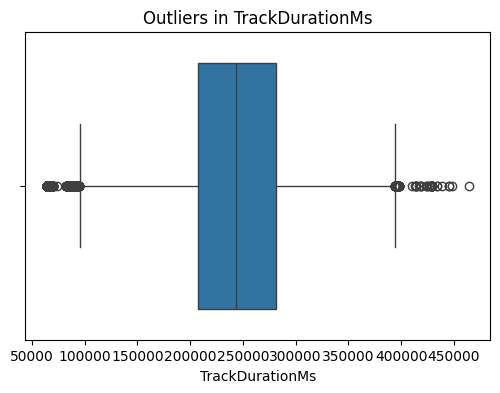

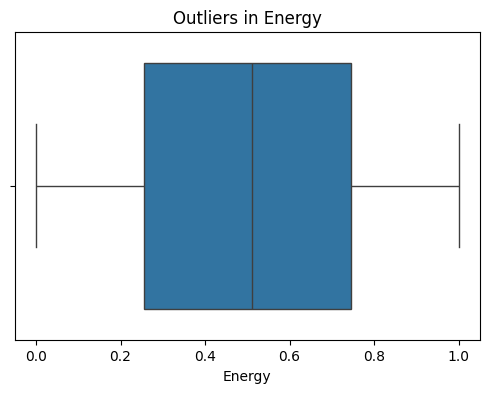

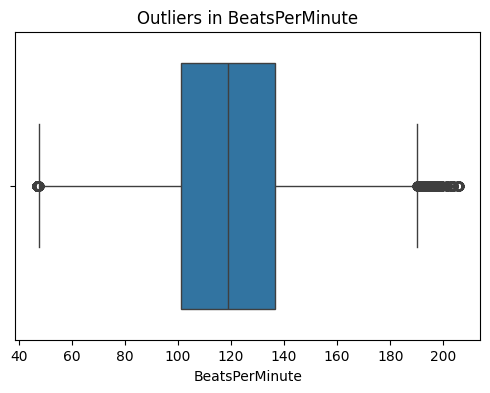

In [11]:
# 7. Outlier Detection (Boxplots)
for col in num_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Outliers in {col}")
    plt.show()

In [12]:
features = ['RhythmScore', 'AudioLoudness', 'VocalContent', 'AcousticQuality']

for col in features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    # Winsorization (capping)
    df[col] = np.where(df[col] < lower, lower,
                       np.where(df[col] > upper, upper, df[col]))

In [13]:
# 8. Feature Engineering Ideas
# Example: Convert TrackDurationMs to minutes
df['TrackDurationMin'] = df['TrackDurationMs'] / 60000
df['Energy_Acoustic_Ratio'] = df['Energy'] / (df['AcousticQuality'] + 1e-5)
df['Vocal_Instrument_Balance'] = df['VocalContent'] / (df['InstrumentalScore'] + 1e-5)
df['MoodRhythm'] = df['MoodScore'] * df['RhythmScore']
df['PerformanceIntensity'] = df['LivePerformanceLikelihood'] * df['AudioLoudness']
df['RhythmEnergy'] = df['RhythmScore'] * df['Energy']
df['MoodAcoustic'] = df['MoodScore'] * df['AcousticQuality']

In [14]:
# 8. XGBoost Model
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
X = df.drop(columns=['id', target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_dist = {
    'max_depth': [3, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [200, 500],
    'subsample': [0.7, 1.0],
    'colsample_bytree': [0.7, 1.0]
}

xgb = XGBRegressor(random_state=42)

random_search = RandomizedSearchCV(
estimator=xgb,
param_distributions=param_dist,
n_iter=20,
scoring='neg_mean_squared_error',
cv=3,
verbose=1,
n_jobs=-1,
random_state=42
)

random_search.fit(X_train, y_train)

print("Best parameters:", random_search.best_params_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters: {'subsample': 0.7, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 0.7}


In [15]:
# 10. Evaluate Best Model
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("R² Score:", r2_score(y_test, y_pred))

RMSE: 26.440139395958088
R² Score: 0.00037780740376835986


c:\Users\samar\anaconda3\envs\myenv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


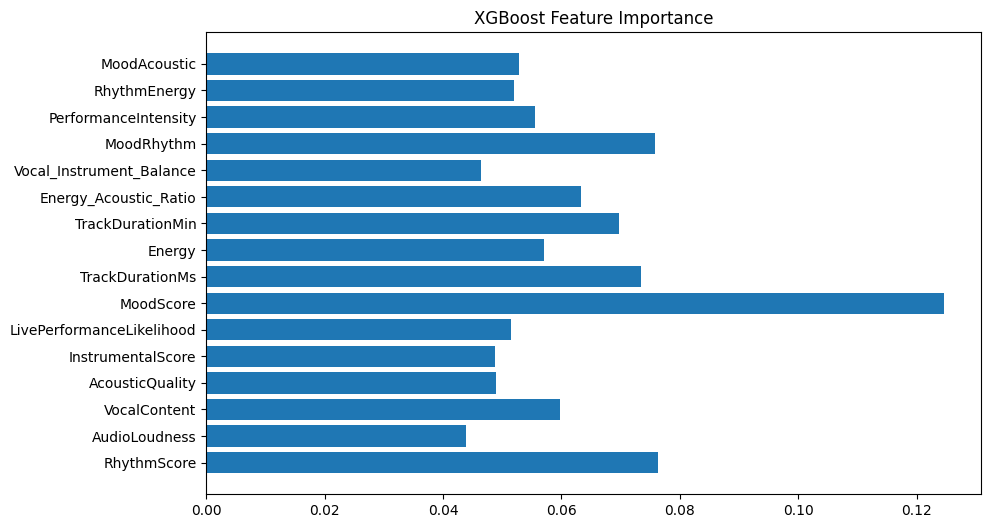

In [16]:
# 11. Feature Importance
plt.figure(figsize=(10,6))
plt.barh(X.columns, best_model.feature_importances_)
plt.title("XGBoost Feature Importance")
plt.show()

In [17]:
test_df = pd.read_csv("test.csv")


# 2. Apply Same Feature Engineering

test_df['TrackDurationMin'] = test_df['TrackDurationMs'] / 60000
test_df['Energy_Acoustic_Ratio'] = test_df['Energy'] / (test_df['AcousticQuality'] + 1e-5)
test_df['Vocal_Instrument_Balance'] = test_df['VocalContent'] / (test_df['InstrumentalScore'] + 1e-5)
test_df['MoodRhythm'] = test_df['MoodScore'] * test_df['RhythmScore']
test_df['PerformanceIntensity'] = test_df['LivePerformanceLikelihood'] * test_df['AudioLoudness']
test_df['RhythmEnergy'] = test_df['RhythmScore'] * test_df['Energy']
test_df['MoodAcoustic'] = test_df['MoodScore'] * test_df['AcousticQuality']


# 3. Ensure Consistent Features

train_features = best_model.get_booster().feature_names  # features used in training

X_test_final = test_df[train_features]  # select only training features (drop id automatically)


# 4. Predict with Best Model

y_pred_test = best_model.predict(X_test_final)


# 5. Save Predictions

output = pd.DataFrame({
    "id": test_df["id"],
    "Predicted_BPM": y_pred_test
})

output.to_csv("test_predictions.csv", index=False)

print("Predictions saved to test_predictions.csv")
print(output.head())

Predictions saved to test_predictions.csv
       id  Predicted_BPM
0  524164     118.960670
1  524165     119.042091
2  524166     119.417763
3  524167     119.257240
4  524168     119.154816
